# Test data iterator with data augmentation

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import sys
sys.path.append('../common')

In [15]:
from data_utils import type_1_ids, type_2_ids, type_3_ids, test_ids
from training_utils import get_trainval_id_type_lists, get_test_id_type_list, data_iterator
from training_utils import data_augmentation
from metrics import logloss_mc

In [38]:
train_id_type_list, _ = get_trainval_id_type_lists()

image_size = (224, 224)
batch_size = 5
train_iter = data_iterator(train_id_type_list, 
                           batch_size=batch_size, 
                           image_size=image_size, 
                           data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
                           verbose=1, 
                           test_mode=False)

Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


((5, 3, 224, 224), dtype('float32'), (5, 3))


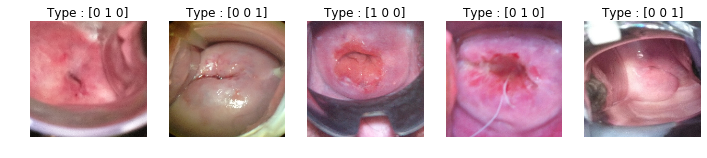

In [53]:
for X, Y in train_iter:
    print(X.shape, X.dtype, Y.shape)
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
        plt.title("Type : {}".format(Y[counter,:]))
        plt.axis('off')
    
    break

In [54]:
train_id_type_list, _ = get_trainval_id_type_lists()

image_size = (224, 224)
batch_size = 5
train_iter = data_iterator(train_id_type_list, 
                           batch_size=batch_size, 
                           image_size=image_size, 
                           data_augmentation_fn=lambda X, Y: data_augmentation(X, Y),
                           verbose=1, 
                           test_mode=True)

Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


('Image id/type:', '1011', 'Type_2', '| counter=', 0)
('Image id/type:', '1028', 'Type_3', '| counter=', 1)
('Image id/type:', '1027', 'Type_1', '| counter=', 2)
('Image id/type:', '1012', 'Type_2', '| counter=', 3)
('Image id/type:', '1029', 'Type_3', '| counter=', 4)
((5, 3, 224, 224), dtype('float32'), (5, 3))


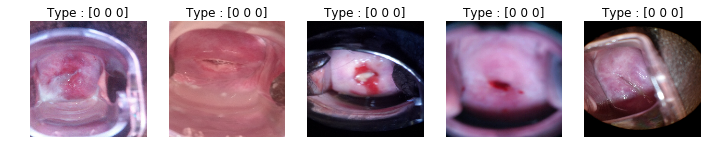

In [60]:
for X, Y, _ in train_iter:
    print(X.shape, X.dtype, Y.shape)
    n = 5
    for counter in range(batch_size):
        if counter % n == 0:
            plt.figure(figsize=(12, 4))
        plt.subplot(1, n, counter % n + 1)
        plt.imshow(X[counter, :, :, :].transpose([1, 2, 0]))
        plt.title("Type : {}".format(Y[counter,:]))
        plt.axis('off')
    
    break